# Fantasy Premier League predictor

#**Dataset import**
Because this project were developed in Google Colab, dataset must be loaded from git repository first.

In [ ]:
!git clone https://github.com/dnestorovic/FPL-Predictor.git

Cloning into 'FPL-Predictor'...
remote: Enumerating objects: 9888, done.
remote: Counting objects: 100% (9888/9888), done.
remote: Compressing objects: 100% (7440/7440), done.
remote: Total 9888 (delta 1524), reused 9880 (delta 1522), pack-reused 0
Receiving objects: 100% (9888/9888), 20.88 MiB | 18.27 MiB/s, done.
Resolving deltas: 100% (1524/1524), done.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sns

# **Dataset**

Loading dataset of merged gameweeks data for last season.

In [ ]:
dataset = pd.read_csv('/content/FPL-Predictor/data/2020-21/gws/merged_gw.csv')

Some informations about dataset:

In [ ]:
print('-------------------------------------------------COLUMNS-------------------------------------------------')
print(np.unique(dataset.columns), end="\n\n")
print('-------------------------------------------------DESCRIBE------------------------------------------------')
print(dataset.describe, end="\n\n")
print('--------------------------------------------------HEAD---------------------------------------------------')
print(dataset.head, end="\n\n")
print('--------------------------------------------------SIZE---------------------------------------------------')
print(dataset.shape)

-------------------------------------------------COLUMNS-------------------------------------------------
['GW' 'assists' 'bonus' 'bps' 'clean_sheets' 'creativity' 'element'
 'fixture' 'goals_conceded' 'goals_scored' 'ict_index' 'influence'
 'kickoff_time' 'minutes' 'name' 'opponent_team' 'own_goals'
 'penalties_missed' 'penalties_saved' 'position' 'red_cards' 'round'
 'saves' 'selected' 'team' 'team_a_score' 'team_h_score' 'threat'
 'total_points' 'transfers_balance' 'transfers_in' 'transfers_out' 'value'
 'was_home' 'xP' 'yellow_cards']

-------------------------------------------------DESCRIBE------------------------------------------------
<bound method NDFrame.describe of                        name position           team  ...  was_home  yellow_cards  GW
0            Aaron Connolly      FWD       Brighton  ...      True             0   1
1           Aaron Cresswell      DEF       West Ham  ...      True             0   1
2                Aaron Mooy      MID       Brighton  ...   

Dataset split by **position**. This section shows how position of a player affects on a:


*   Goals
*   Assists
*   Bonus points
*   Own goals
*   Average cost
*   Total points


In [ ]:
goalkeepers = pd.DataFrame(dataset[dataset['position'] == 'GK'])
defenders = pd.DataFrame(dataset[dataset['position'] == 'DEF'])
midfielders = pd.DataFrame(dataset[dataset['position'] == 'MID'])
forwards = pd.DataFrame(dataset[dataset['position'] == 'FWD'])

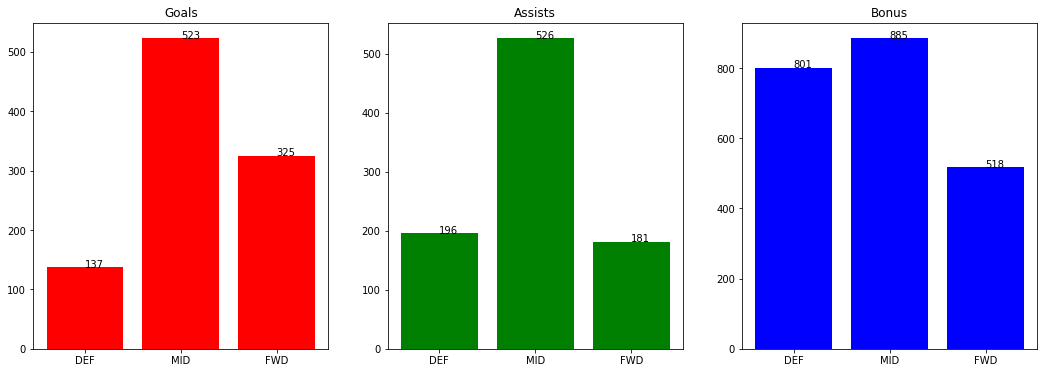

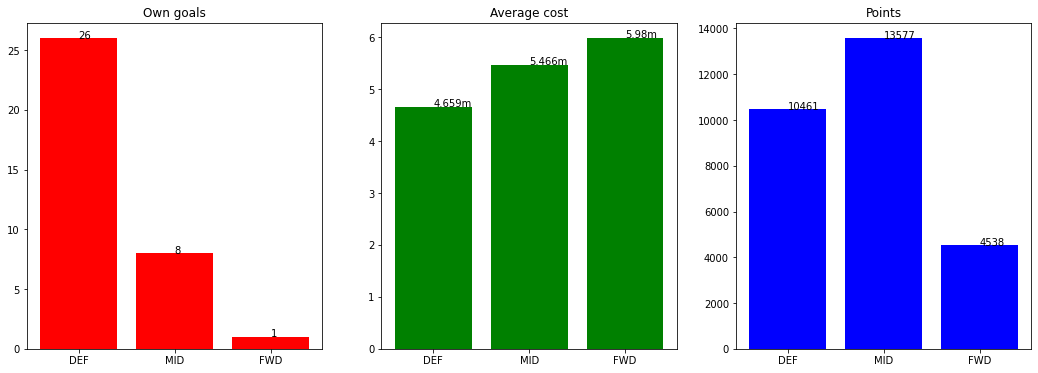

In [ ]:
positions = ['DEF', 'MID', 'FWD']

goals = [defenders['goals_scored'].sum(), midfielders['goals_scored'].sum(), forwards['goals_scored'].sum()]
assists = [defenders['assists'].sum(), midfielders['assists'].sum(), forwards['assists'].sum()]
bonus = [defenders['bonus'].sum(), midfielders['bonus'].sum(), forwards['bonus'].sum()]

own_goals = [defenders['own_goals'].sum(), midfielders['own_goals'].sum(), forwards['own_goals'].sum()]
mean_value = [defenders['value'].mean()/10, midfielders['value'].mean()/10, forwards['value'].mean()/10]
points = [defenders['total_points'].sum(), midfielders['total_points'].sum(), forwards['total_points'].sum()]



plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
plt.title('Goals')
plt.bar(positions, goals, color = 'r')
for i, v in enumerate(goals):
    plt.text(positions[i], v + 0.01, str(v))


plt.subplot(1, 3, 2)
plt.title('Assists')
plt.bar(positions, assists,  color = 'g')
for i, v in enumerate(assists):
    plt.text(positions[i], v + 0.01, str(v))


plt.subplot(1, 3, 3)
plt.title('Bonus')
plt.bar(positions, bonus,  color = 'b')
for i, v in enumerate(bonus):
    plt.text(positions[i], v + 0.01, str(v))

plt.show


plt.figure(figsize=(18,6))

plt.subplot(1, 3, 1)
plt.title('Own goals')
plt.bar(positions, own_goals,  color = 'r')
for i, v in enumerate(own_goals):
    plt.text(positions[i], v + 0.01, str(v))

plt.subplot(1, 3, 2)
plt.title('Average cost')
plt.bar(positions, mean_value,  color = 'g')
for i, v in enumerate(mean_value):
    plt.text(positions[i], v + 0.01, str(round(v, 3))+'m')


plt.subplot(1, 3, 3)
plt.title('Points')
plt.bar(positions, points,  color = 'b')
for i, v in enumerate(points):
    plt.text(positions[i], v + 0.01, str(v))


plt.show()

Dataset split by **gameweeks**(There is possibility to get informations about gameweeks from separate files, but I will use informations loaded from merged file).

In [ ]:
number_of_allready_played_gameweeks = len(np.unique(dataset['GW']))
print(number_of_allready_played_gameweeks)

38


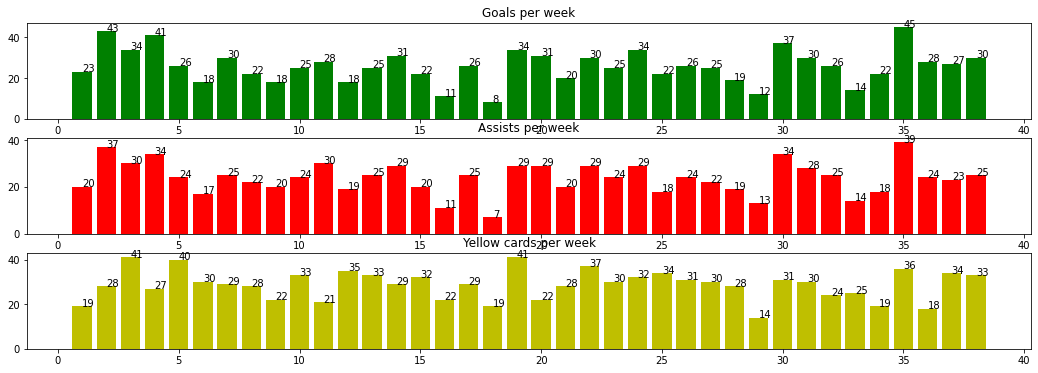

In [ ]:
# get separate gameweeks into one array 
gameweeks = [dataset[dataset['GW'] == i] for i in range(1, number_of_allready_played_gameweeks + 1)]

goals_per_week = [gameweeks[i]['goals_scored'].sum() for i in range(number_of_allready_played_gameweeks)]
assists_per_week = [gameweeks[i]['assists'].sum() for i in range(number_of_allready_played_gameweeks)]
yellows_per_week = [gameweeks[i]['yellow_cards'].sum() for i in range(number_of_allready_played_gameweeks)]



plt.figure(figsize=(18, 6))

# plot goals per week
plt.subplot(3, 1, 1)
plt.bar(range(1, number_of_allready_played_gameweeks + 1), goals_per_week, color = 'g')
plt.title('Goals per week')
for i, v in enumerate(goals_per_week):
    plt.text(i+1, v + 0.01, str(v))


# plot assists per week
plt.subplot(3, 1, 2)
plt.bar(range(1, number_of_allready_played_gameweeks + 1), assists_per_week, color = 'r')
plt.title('Assists per week')
for i, v in enumerate(assists_per_week):
    plt.text(i+1, v + 0.01, str(v))


# plot yellow cards per week
plt.subplot(3, 1, 3)
plt.bar(range(1, number_of_allready_played_gameweeks + 1), yellows_per_week, color = 'y')
plt.title('Yellow cards per week')
for i, v in enumerate(yellows_per_week):
    plt.text(i+1, v + 0.01, str(v))


plt.show()

## Data preperation

Some attributes that aren't currently in dataset, should help in our neural network. For example player goals form, player assists form, player form at home, player away form, club current form, club home/away form...

### Individual player stats

In [ ]:
def create_form_for_specific_week(attribute, current_week, dataset):

    # get last 5 weeks
    all_weeks_before = dataset[dataset['GW'] < current_week]  
    last_5_weeks = all_weeks_before[all_weeks_before['GW'] > current_week - 6]

    # get current gameweek
    gameweek = dataset[dataset['GW'] == current_week]

    stats = []
    for index, row in gameweek.iterrows():
        # get player
        player = row['name']

        # get stats about given attreibute for current player
        player_stats = last_5_weeks[last_5_weeks['name'] == player][attribute].sum()

        # append result in stats array
        stats.append(player_stats)
    
    return stats



In [ ]:
def calculate_player_form(attribute, current_week, dataset):

    # get stats about each gameweek
    non_flatten_stats_column = []

    # itterate thought evry gameweek untill current
    for i in range(current_week+1):
        # call function to calculate form for current gameweek
        gw = create_form_for_specific_week(attribute, i+1, dataset)
        
        # append results 
        non_flatten_stats_column.append(gw)

    # flat list of lists into single list
    flat_list = [stat for gw in non_flatten_stats_column for stat in gw]

    # print result size and dataset size just to assume that everything performed well
    print(len(flat_list), dataset.shape)

    return flat_list


**Forms depended on players individual stats.**

In [ ]:
assists_forms =  calculate_player_form('assists', number_of_allready_played_gameweeks, dataset)
goals_form = calculate_player_form('goals_scored', number_of_allready_played_gameweeks, dataset)
bonus_form = calculate_player_form('bonus', number_of_allready_played_gameweeks, dataset)
yellow_cards_form = calculate_player_form('yellow_cards', number_of_allready_played_gameweeks, dataset)
red_cards_form = calculate_player_form('red_cards', number_of_allready_played_gameweeks, dataset)
clean_sheets_form = calculate_player_form('clean_sheets', number_of_allready_played_gameweeks, dataset)
total_points_form = calculate_player_form('total_points', number_of_allready_played_gameweeks, dataset)


dataset.insert(dataset.shape[1], 'assists_form' ,assists_forms)
dataset.insert(dataset.shape[1], 'goals_form', goals_form)
dataset.insert(dataset.shape[1], 'bonus_form', bonus_form)
dataset.insert(dataset.shape[1], 'yellow_cards_form', yellow_cards_form)
dataset.insert(dataset.shape[1], 'red_cards_form', red_cards_form)
dataset.insert(dataset.shape[1], 'clean_sheets_form', clean_sheets_form)
dataset.insert(dataset.shape[1], 'total_points_form', total_points_form)


print(dataset)

24365 (24365, 36)
24365 (24365, 36)
24365 (24365, 36)
24365 (24365, 36)
24365 (24365, 36)
24365 (24365, 36)
24365 (24365, 36)
                       name position  ... clean_sheets_form  total_points_form
0            Aaron Connolly      FWD  ...                 0                  0
1           Aaron Cresswell      DEF  ...                 0                  0
2                Aaron Mooy      MID  ...                 0                  0
3            Aaron Ramsdale       GK  ...                 0                  0
4        Abdoulaye Doucouré      MID  ...                 0                  0
...                     ...      ...  ...               ...                ...
24360        Aaron Ramsdale       GK  ...                 2                 27
24361          Adrien Silva      MID  ...                 0                  0
24362        Sidnei Tavares      MID  ...                 0                  0
24363       Kalvin Phillips      MID  ...                 2                  6
24364

### Club stats

#### Create clubs dataframe

In [ ]:
import os

number_of_teams = 20

files = os.listdir('/content/FPL-Predictor/data/2020-21/understat')

dataframes_list = []
for f in files:
    current_club = pd.read_csv('/content/FPL-Predictor/data/2020-21/understat/' + f)
    current_club['name'] = f[10:].split('.')[0]
    dataframes_list.append(current_club)

clubs_dataframe = dataframes_list[0]
clubs_dataframe.append(dataframes_list[1])
    




0     Aston_Villa
1     Aston_Villa
2     Aston_Villa
3     Aston_Villa
4     Aston_Villa
         ...     
33        Arsenal
34        Arsenal
35        Arsenal
36        Arsenal
37        Arsenal
Name: name, Length: 1398, dtype: object


## Train-test split

As there is 38 gameweeks, 20% is nearly 7 gameweeks, so I will set every 7th gameweek as a test gameweek.

In [ ]:
train_dataset = dataset[dataset['GW'] % 7 != 0]
test_dataset = dataset[dataset['GW'] % 7 == 0]